# Simple Maze Resolution
## Use Genetic Algorithm to perform Novelty Search to find the optimal solution for a given maze
Pierre Moreau - Etienne Meunier

In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import math
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def number_combinations(n,k) :
    return math.factorial(n)/((math.factorial(n-k))*math.factorial(k))

# Define the Maze

In [3]:
Maze = np.array([['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'], 
    ['#', ' ', '#', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', ' ', '#'], 
    ['#', ' ', '#', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', ' ', '#'], 
    ['#', ' ', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', ' ', '#'],
    ['#', 'P', '#', '#', '#', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', '#'],
    ['#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', ' ', '#'],
    ['#', ' ', '#', '#', '#', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', '#', '#', '#', '#', ' ', ' ', '#', 'F', '#'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']])
start_position = [5,1]

In [5]:
print(Maze)

[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' ' ' '#' '#' '#' '#' ' ' '#' ' ' '#' '#' '#' ' ' ' ' '#']
 ['#' ' ' '#' '#' '#' '#' ' ' '#' ' ' '#' '#' '#' ' ' ' ' '#']
 ['#' ' ' '#' '#' '#' '#' '#' '#' ' ' '#' ' ' '#' ' ' ' ' '#']
 ['#' 'P' '#' '#' '#' '#' ' ' ' ' ' ' '#' ' ' '#' ' ' ' ' '#']
 ['#' ' ' '#' '#' '#' '#' '#' '#' '#' '#' ' ' '#' '#' ' ' '#']
 ['#' ' ' '#' '#' '#' ' ' ' ' ' ' ' ' ' ' ' ' '#' '#' ' ' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' '#' '#' '#' ' ' ' ' '#' 'F' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]


In [247]:
def draw_move(maze,gen) :
    d_maze = maze.copy()
    position = [5,1]
    for l in gen :
        position,_ = move(l,position)
        d_maze[position[0],position[1]] = "*"
        #print(d_maze)
        #input()
    return d_maze

# Moving Function

In [9]:
def move(d,position) :
    if d == 1 : 
        move_x = 0
        move_y = -1
    if d == 2 : 
        move_x = 0
        move_y = 1
    if d == 3 : 
        move_x = 1
        move_y = 0
    if d == 4 : 
        move_x = -1
        move_y = 0
    if Maze[position[0]+move_y,position[1]+move_x] == "#" :
        return position,-1
    else :
        position[0] = position[0]+move_y
        position[1] = position[1]+move_x
        return position,1

# Create Genome

In [5]:
def generation(moves = 10000) :
    min_move = 20
    max_move = 100
    gen = np.random.randint(1,4,np.random.randint(min_move,max_move,1))
    #gen = np.random.randint(1,4,moves)
    return gen

# Evaluate the Genome 

There is several techniques to evaluate a given solution, we tried to use the number of moves only, then to penalize the fact to run into a wall. 
We end up by using the first one. 

In [65]:
def evaluate_gen(gen) :
    position = [5,1]
    count_move = 0
    for d in gen : 
        count_move +=1
        position,_ = move(d,position)
        if Maze[position[0],position[1]]=="F" :
            gen = np.delete(gen,np.s_[count_move:])
            return gen,count_move
    return gen,10000

In [28]:
def evaluate_gen2(gen) :
    position = [5,1]
    final_position = [8,13]
    count_move = 0
    score = 0
    for d in gen : 
        count_move +=1
        position,s = move(d,position)
        if Maze[position[0],position[1]]=="#" : 
            score+=1
        if Maze[position[0],position[1]]=="F" :
            gen = np.delete(gen,np.s_[count_move:])
            return gen,score
        score += np.abs(position[0]-final_position[0])+np.abs(position[1]-final_position[1])
    return gen,score

Simirarly, we tried 2 different mating techniques. 

In [7]:
def mate(p1,p2) :
    ip1 = np.random.randint(1,len(p1))
    ip2 = np.random.randint(1,len(p2))
    child=np.concatenate((p1[:ip1],p2[ip2:]))
    return child

In [8]:
def mate2(p1,p2) :
    child = p1.copy()
    for idx in np.random.randint(0,min(len(p1),len(p2)),1):
        child[idx] = p2[idx]
    return child

In [79]:
def mate3(p1,p2) :
    r = np.random.random(1)[0]
    child=np.concatenate((p1[:int(round(r*len(p1)))],p2[int(round(r*len(p2))):]))
    return child

# Launch Selection

In [ ]:
n_parents = 100
p_selection = 0.33
max_children = 100
n_mutation = 5
iteration=0
parents = np.array([generation() for a in range(1,n_parents)])
sum_succeed = []
min_moves = []
best_move = []

for a in range(0,100) : 
    iteration = iteration+1
    ## Compute mean sum 
    res = [evaluate_gen(x) for x in parents]
    parents = np.array([r[0] for r in res])
    scores = np.array([r[1] for r in res])
    min_score= np.min(scores)
    min_moves.append(min_score)
    if min_score <= np.min(min_moves):
        best_move = parents[scores==min_score]
    ## Do the selection 
    arr1inds = np.array(scores).argsort()
    sorted_parents = parents[arr1inds]
    selection = sorted_parents[:int(round(len(sorted_parents)*p_selection))]
    ## Create children
    children = list()
    while len(children) < max_children :
        i = np.random.randint(0,len(selection))
        j = np.random.randint(0,len(selection))
        if i!=j : 
            children.append(mate2(selection[i],selection[j]))
    ## Random mutations 
    for a in range(0,n_mutation) :
        ind =np.random.randint(0,len(children))
        children[ind]=np.delete(children[ind],np.random.randint(0,len(children[ind])))
    ## Children become parents now
    parents = np.array(children)

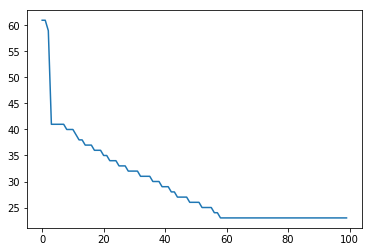

In [263]:
plt.plot(min_moves)

In [261]:
draw_move(Maze,best_move)

[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '*' '*' '*' '*' '*' '*' '*' '*' '*' '*' '*' '*' '*' '#']
 ['#' '*' '#' '#' '#' '#' ' ' '#' ' ' '#' '#' '#' ' ' '*' '#']
 ['#' '*' '#' '#' '#' '#' ' ' '#' ' ' '#' '#' '#' ' ' '*' '#']
 ['#' '*' '#' '#' '#' '#' '#' '#' ' ' '#' ' ' '#' ' ' '*' '#']
 ['#' 'P' '#' '#' '#' '#' ' ' ' ' ' ' '#' ' ' '#' ' ' '*' '#']
 ['#' ' ' '#' '#' '#' '#' '#' '#' '#' '#' ' ' '#' '#' '*' '#']
 ['#' ' ' '#' '#' '#' ' ' ' ' ' ' ' ' ' ' ' ' '#' '#' '*' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' '#' '#' '#' ' ' ' ' '#' '*' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]
